In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import matplotlib as mpl
mpl.rc('font', family='AppleGothic')

## 이항분포

[3 4 3 3 3 3 3 5 6 3 4 3 3 5 1 1 0 4 4 5 6 4 3 4 1 3 1 5 3 3 2 4 3 3 0 3 3
 3 5 4 2 3 4 1 4 4 2 1 2 2]
3.08


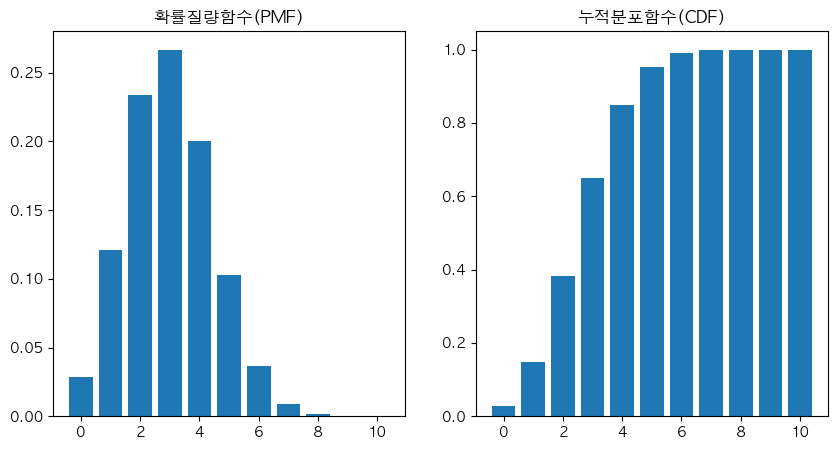

In [2]:
'''
X~B(n,p)에 대한 분포를 그려보자.
[이항분포 확률변수] stat_bin = scipy.stats.binom(n,p)
[확률질량함수 시각화] stat_bin.pmf(x축) - 정확히 K번 성공할 확률
[누적분포함수 시각화] stat_bin.pmf(x축) - k이하로 성공할 누적확률
[이항분포 랜덤샘플] np.random.binomial(n,p,size) / n: 
'''
n, p = 10, 0.3  # n:시행횟수, p:성공확률
stat_bin = sp.stats.binom(n,p) # 이항분포 확률변수

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

x_axis = np.arange(n + 1) ## 0부터 시작하는 전체 인덱스를 넣어야 하므로 +1
axes[0].bar(x_axis, stat_bin.pmf(x_axis))
axes[0].set_title("확률질량함수(PMF)")

axes[1].bar(x_axis, stat_bin.cdf(x_axis))
axes[1].set_title("누적분포함수(CDF)")


# Q3. 랜덤표본 추출
## seed 설정 seed=0 
np.random.seed(seed=0)

## 랜덤 샘플 추출
random_bin = np.random.binomial(n=10, p=0.3, size=50)
print(random_bin)
## 평균계산
bin_mean = np.mean(random_bin)
print(bin_mean)

## 초기하분포

[2 3 2 1 0 1 2 2 1 1 2 3 1 0 4 2 2 1 1 1 1 2 3 0 1 3 1 4 2 4 1 1 0 0 1 1 3
 2 3 2 2 0 3 0 4 3 1 5 2 1]
1.76


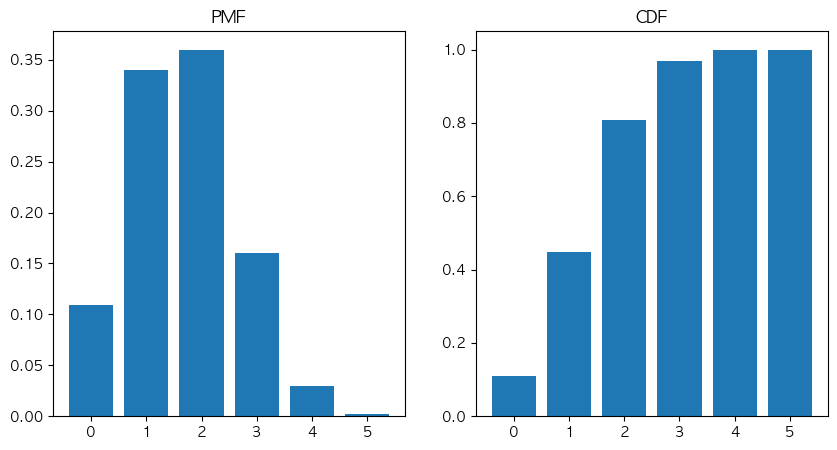

In [ ]:
'''
초기하분포 : scipy.stats.hypergeom(M, n, N) - M(전체모집단크기), n(성공항목개수), N(샘플링개수)
확률질량함수(PMF) : stats_bin.pmf(x축)
누적분포함수(CDF) : stats_bin.cdf(x축)
초기하분포 무작위샘플링 :  np.random.hypergeometric(ngood=5, nbad=25, nsample=10, size=50)
    ㄴ ngood : 성공항목수
    ㄴ nbad : 실패항목수
    ㄴ nsample : 뽑을 개수
    ㄴ size : 반복횟수
'''
# Q1. 초기하분포 pmf 그리기
## 초기하분포 생성
[M, n, N] = [30, 5, 10]
stat_hyp = sp.stats.hypergeom(M, n, N)

## 그리기
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
x_axis = np.arange(n + 1) 
axes[0].bar(x_axis, stat_hyp.pmf(x_axis))
axes[0].set_title("PMF")

# Q2. 초기하분포 cdf 그리기 
## cdf 만드는 코드를 작성해 주세요
axes[1].bar(x_axis, stat_hyp.cdf(x_axis))
axes[1].set_title("CDF")

# Q3. 랜덤표본 추출
## seed 설정 seed=0 
np.random.seed(seed=0)
## 랜덤 샘플 추출
''' 
공장에서 A공정에서는 모니터를 30개씩 생산하고 있습니다. 
이 공정의 불량률을 검사하는데 양품이 25개, 불량품이 5개인 공정에서 
10개의 모니터를 추출해 불량품인지 확인 해보겠습니다.
'''
random_hyp = np.random.hypergeometric(ngood=5, nbad=25, nsample=10, size=50)
print(random_hyp)
## 평균계산
hyp_mean = np.mean(random_hyp)
print(hyp_mean)


## 균일분포

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
 0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
 0.77815675 0.87001215 0.97861834 0.79915856 0.46147936 0.78052918
 0.11827443 0.63992102 0.14335329 0.94466892 0.52184832 0.41466194
 0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
 0.61209572 0.616934   0.94374808 0.6818203  0.3595079  0.43703195
 0.6976312  0.06022547 0.66676672 0.67063787 0.21038256 0.1289263
 0.31542835 0.36371077 0.57019677 0.43860151 0.98837384 0.10204481
 0.20887676 0.16130952 0.65310833 0.2532916  0.46631077 0.24442559
 0.15896958 0.11037514 0.65632959 0.13818295 0.19658236 0.36872517
 0.82099323 0.09710128 0.83794491 0.09609841 0.97645947 0.4686512
 0.97676109 0.60484552 0.73926358 0.03918779 0.28280696 0.12019656
 0.2961402  0.11872772 0.31798318 0.41426299 0.0641475  0.69247212
 0.56660145 0.26538949 0.52324805 0.09394051 0.5759465  0.9292962

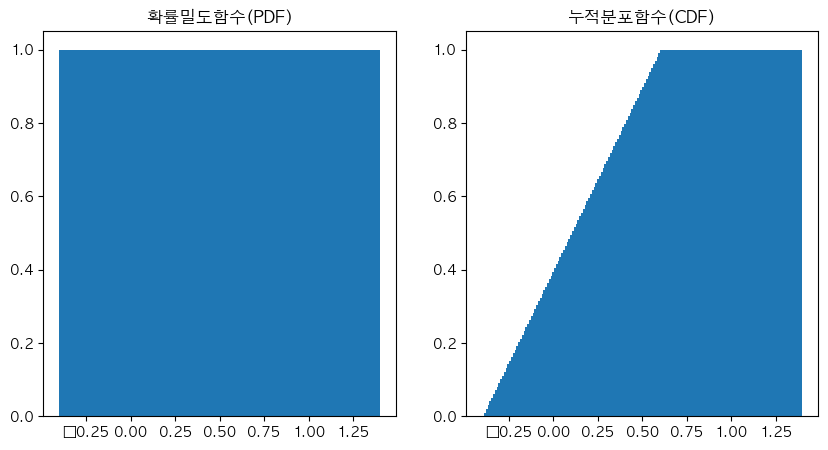

In [16]:
'''
연속균일분포 생성 : scipy.stats.uniform(loc, scale) 
    ㄴ loc: 시작값
    ㄴ scale: 범위 (scale=1, [0,1]구간에서 균등하게 ㅂ문포됨)
'''
stat_uni = sp.stats.uniform(0, 1)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
## pdf를 만드는 코드를 작성해 주세요
x_axis = np.linspace(0, 1, 100) # (0,1 사이에 100개의 점)
axes[0].bar(x_axis, stat_uni.pdf(x_axis))
axes[0].set_title("확률밀도함수(PDF)") 

axes[1].bar(x_axis, stat_uni.cdf(x_axis))
axes[1].set_title("누적분포함수(CDF)")

# Q3. 균일분포 샘플링
## seed 설정
np.random.seed(seed=0)
random_uni = np.random.uniform(0, 1, 100)
print(random_uni) 

## 평균 계산
uni_mean = np.mean(random_uni)
print(uni_mean)


## 정규분포

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  0.90082649  0

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  func(*args, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


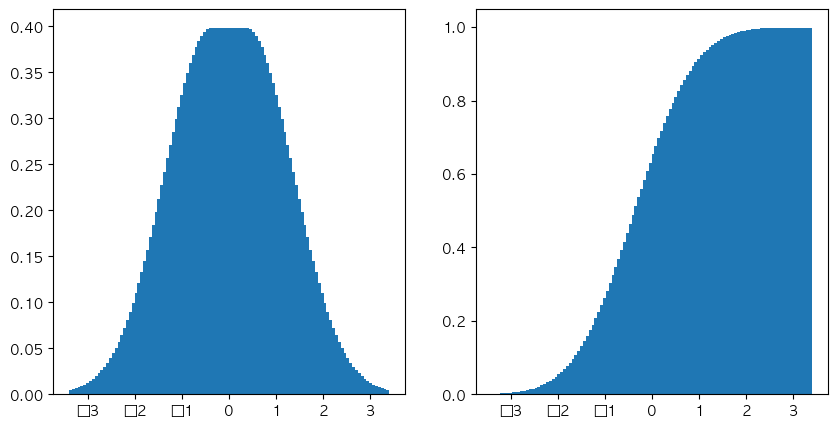

In [ ]:
'''
정규분포 생성 : scipy.stats.norm(loc, scale) 
    ㄴ loc: 평균
    ㄴ scale: 표준편차
    
mu가 0이고 sigma가 1인 정규분포인 표준정규분포 X~N(0, 1) 에 대하여 알아보겠습니다.
'''
stat_nor = sp.stats.norm(0,1)

## 그리기
fig, ax = plt.subplots(1,2, figsize=(10,5))
x_axis = np.linspace(-3, 3, 100)
ax[0].bar(x_axis, stat_nor.pdf(x_axis))
ax[1].bar(x_axis, stat_nor.cdf(x_axis))

# Q3. 정규분포 샘플링
## seed 설정
np.random.seed(seed=0)

random_nor = np.random.normal(0, 1, 100)
print(random_nor) 

## 평균 계산
nor_mean = np.mean(random_nor)
print(nor_mean)

## 이항 검정

In [ ]:
np.random.seed(seed = 0)

## 샘플 추출
# 귀무가설의 모수 p=0.5 / 베르누이의 분포를 따르므로 p=0.5 / 반복횟수 = 50
random_ber = np.random.binomial(n=1, p=0.5, size=50)
print(random_ber)

n_ber = n_ber = np.count_nonzero(random_ber) # count_nonzero - 0이 아닌값의 개수를 세어준다
print(n_ber)

## 가설 검정
binom_test = sp.stats.binom_test(n_ber, 50)
print(binom_test)


[1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1
 1 1 1 0 0 1 0 1 1 0 0 0 0]
30


AttributeError: module 'scipy.stats' has no attribute 'binom_test'

## 모평균 가설검정

In [21]:
np.random.seed(seed = 0)

## 샘플 추출
random_nor = np.random.normal(100,5,10)
print(random_nor)

## 평균 계산
nor_mean = np.mean(random_nor)
print(nor_mean)

## 모평균 가설 검정 함수 정의
def ztest(stat, mu, sigma):
    z = (stat.mean() - mu) / (sigma / np.sqrt(len(stat)))
    return (2 * (1 - sp.stats.norm.cdf(z)))

## 모평균 가설 검정
mu_test = ztest(random_nor, 100, 5)
print(mu_test)

[108.82026173 102.00078604 104.89368992 111.204466   109.33778995
  95.1136106  104.75044209  99.24321396  99.48390574 102.05299251]
103.69011585364417
0.019604406021683562
